In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.graph_objects as go

pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv("Final Analysis.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [7]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

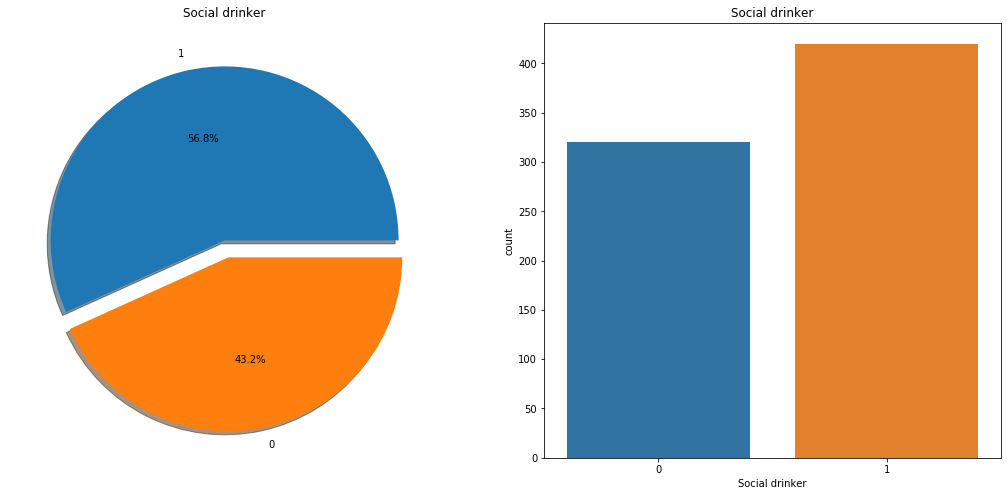

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Social drinker'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Social drinker')
ax[0].set_ylabel('')
sns.countplot('Social drinker',data=df,ax=ax[1])
ax[1].set_title('Social drinker')
plt.show()

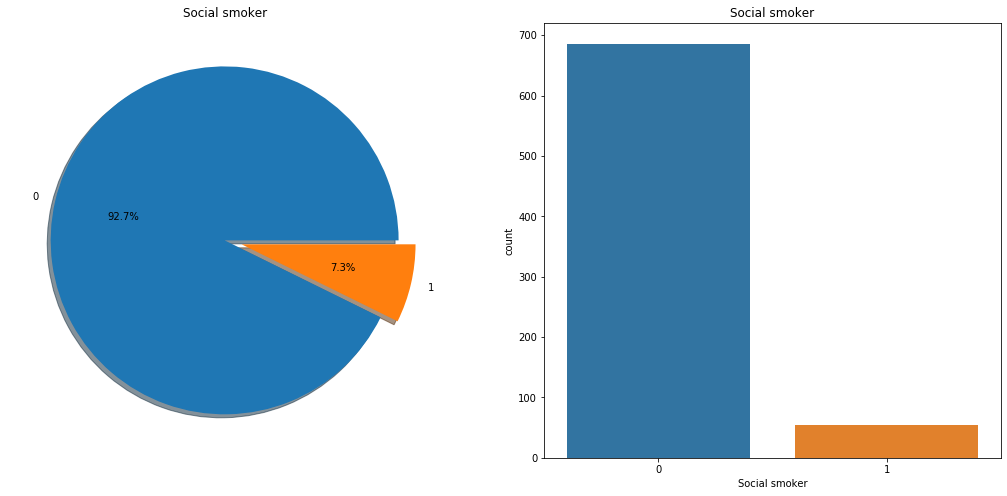

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Social smoker'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Social smoker')
ax[0].set_ylabel('')
sns.countplot('Social smoker',data=df,ax=ax[1])
ax[1].set_title('Social smoker')
plt.show()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


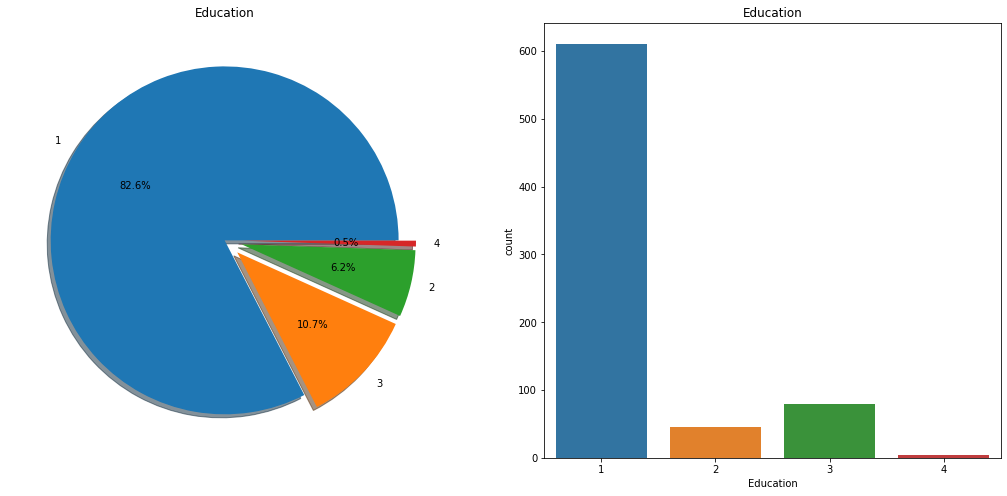

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Education')
ax[0].set_ylabel('')
sns.countplot('Education',data=df,ax=ax[1])
ax[1].set_title('Education')
plt.show()

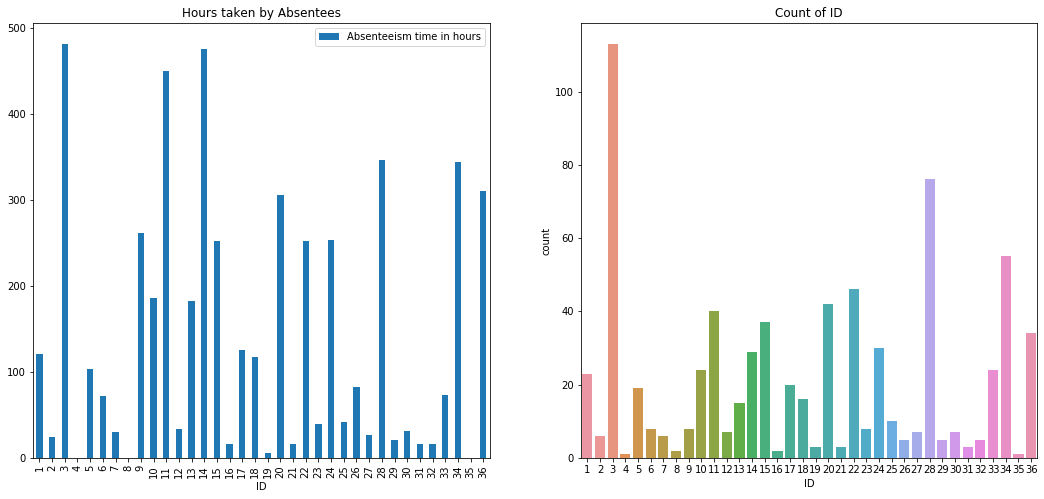

In [46]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['ID','Absenteeism time in hours']].groupby(['ID']).sum().plot.bar(ax=ax[0])
ax[0].set_title('Hours taken by Absentees')
sns.countplot('ID',data=df,ax=ax[1])
ax[1].set_title('Count of ID')
plt.show()

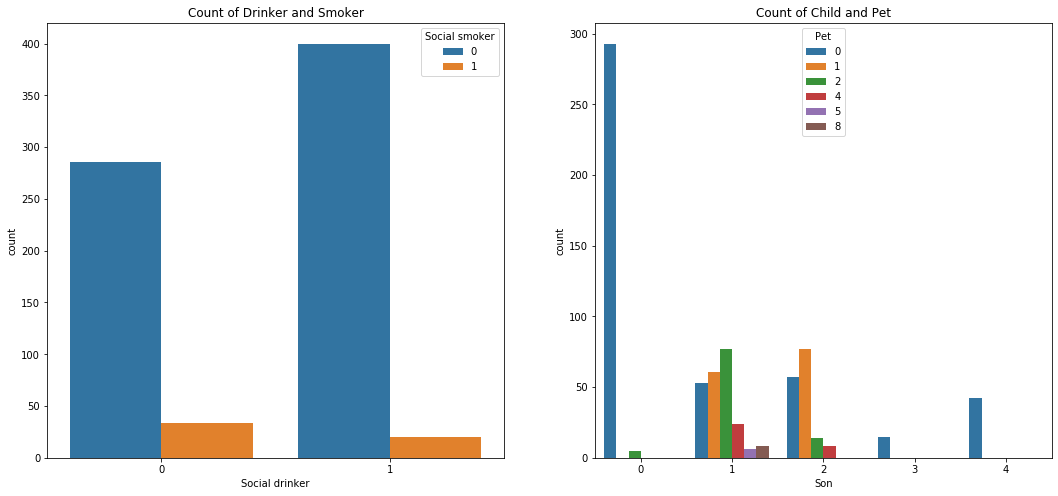

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Social drinker',hue='Social smoker',data=df, ax = ax[0])
ax[0].set_title('Count of Drinker and Smoker')
sns.countplot('Son',hue='Pet',data=df,ax=ax[1])
ax[1].set_title('Count of Child and Pet')
plt.show()

In [32]:
df[df["ID"]==3]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
13,3,11,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,1
14,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,4
16,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,3,27,3,5,2,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3
645,3,27,3,6,2,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3
646,3,27,3,3,3,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3
649,3,27,3,4,3,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3


In [33]:
df[df["ID"]==3]["Transportation expense"].unique()

array([179], dtype=int64)

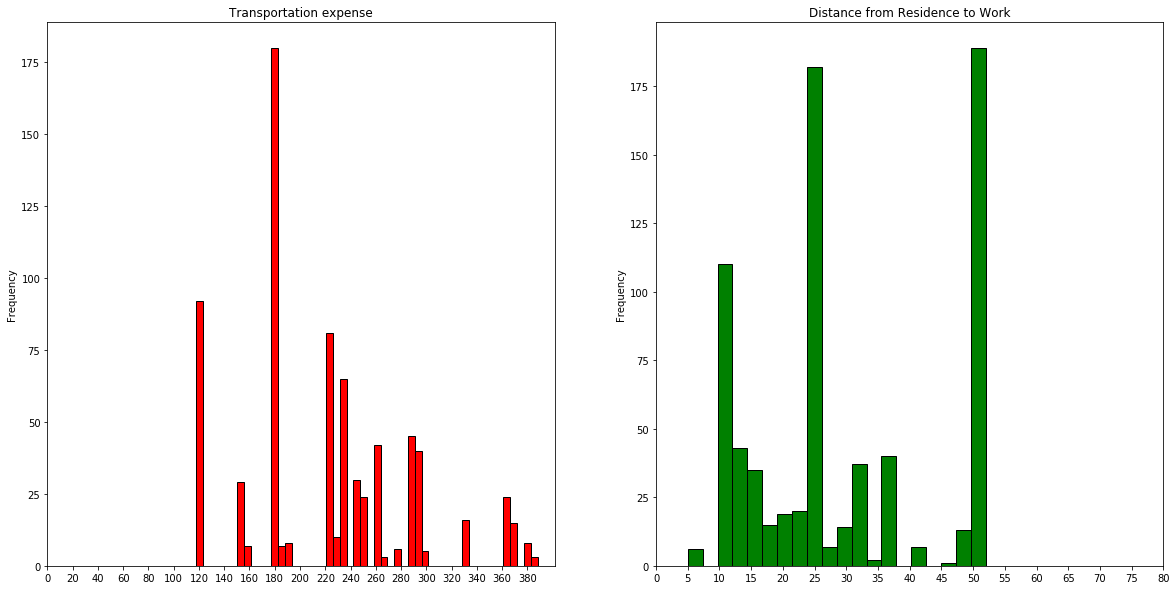

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df["Transportation expense"].plot.hist(ax=ax[0],bins=50,edgecolor='black',color='red')
ax[0].set_title('Transportation expense')
x1=list(range(0,400,20))
ax[0].set_xticks(x1)
df["Distance from Residence to Work"].plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Distance from Residence to Work')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [41]:
df[(df["Transportation expense"]>170) & (df["Distance from Residence to Work"]>45)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
10,20,1,7,2,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,12,19,6,6,3,233,51,1,31,275.089,...,0,2,1,1,0,8,68,178,21,8
721,12,22,6,5,1,233,51,1,31,275.089,...,0,2,1,1,0,8,68,178,21,8
724,12,22,6,4,1,233,51,1,31,275.089,...,0,2,1,1,0,8,68,178,21,3
726,12,19,7,6,1,233,51,1,31,264.604,...,0,2,1,1,0,8,68,178,21,2


In [42]:
df[df["Month of absence"]==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [43]:
df[df["Reason for absence"]==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241.476,...,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241.476,...,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241.476,...,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241.476,...,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241.476,...,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253.465,...,1,1,1,1,0,0,98,178,31,0
203,2,0,4,2,3,235,29,12,48,326.452,...,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378.884,...,1,1,2,1,1,0,68,168,24,0
214,18,0,5,4,3,330,16,4,28,378.884,...,1,2,0,0,0,0,84,182,25,0


In [44]:
df[df["Absenteeism time in hours"]==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241.476,...,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241.476,...,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241.476,...,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241.476,...,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241.476,...,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253.465,...,1,1,1,1,0,0,98,178,31,0
134,34,27,1,2,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,0
203,2,0,4,2,3,235,29,12,48,326.452,...,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378.884,...,1,1,2,1,1,0,68,168,24,0


In [10]:
print(df.groupby(["ID"]))

In [27]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [28]:
df.groupby(["ID"]).aggregate({
    "Distance from Residence to Work" : "mean",
    "Transportation expense" : "mean",
    "Absenteeism time in hours" : "sum",
    "Reason for absence" : [np.size, stats.mode],
    "Work load Average/day " : "mean"
})

Distance from Residence to Work Transportation expense  \
                              mean                   mean   
ID                                                          
1                             11.0                    235   
2                             29.0                    235   
3                             51.0                    179   
4                             14.0                    118   
5                             20.0                    235   
6                             29.0                    189   
7                              5.0                    279   
8                             35.0                    231   
9                             14.0                    228   
10                            52.0                    361   
11                            36.0                    289   
12                            51.0                    233   
13                            17.0                    369   
14                            12.0                    155   
15                            31.0                    291   
16                            15.0                    118   
17                            22.0                    179   
18                            16.0                    330   
19                            50.0                    291   
20                            50.0                    260   
21                            11.0                    268   
22                            26.0                    179   
23                            49.0                    378   
24                            25.0                    246   
25                            16.0                    235   
26                            26.0                    300   
27                            42.0                    184   
28                            26.0                    225   
29                            17.2                    225   
30                            27.0                    157   
31                            15.0                    388   
32                            48.0                    289   
33                            25.0                    248   
34                            10.0                    118   
35                            45.0                    179   
36                            13.0                    118   

   Absenteeism time in hours Reason for absence                \
                         sum               size          mode   
ID                                                              
1                        121                 23   ([22], [4])   
2                         25                  6    ([0], [2])   
3                        482                113  ([27], [38])   
4                          0                  1    ([0], [1])   
5                        104                 19   ([26], [9])   
6                         72                  8   ([22], [3])   
7                         30                  6    ([0], [2])   
8                          0                  2    ([0], [2])   
9                        262                  8    ([6], [2])   
10                       186                 24  ([22], [11])   
11                       450                 40   ([19], [8])   
12                        34                  7   ([19], [3])   
13                       183                 15   ([10], [3])   
14                       476                 29   ([23], [7])   
15                       253                 37  ([28], [16])   
16                        16                  2    ([7], [1])   
17                       126                 20   ([25], [6])   
18                       118                 16   ([23], [3])   
19                         6                  3    ([0], [1])   
20                       306                 42  ([28], [19])   
21                        16                  3    ([0], [1])   
22                       253                 46  ([27], [15])  

In [13]:
df_id_3 = df[df["ID"]==3]

In [20]:
df_id_3[df_id_3["Reason for absence"]==27]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
370,3,27,2,4,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
375,3,27,2,2,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,2
376,3,27,2,4,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
379,3,27,2,6,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
381,3,27,2,2,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
385,3,27,2,4,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
386,3,27,2,6,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
388,3,27,2,4,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
389,3,27,2,6,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
581,3,27,1,4,2,179,51,18,38,313.532,...,0,1,0,1,0,0,89,170,31,3


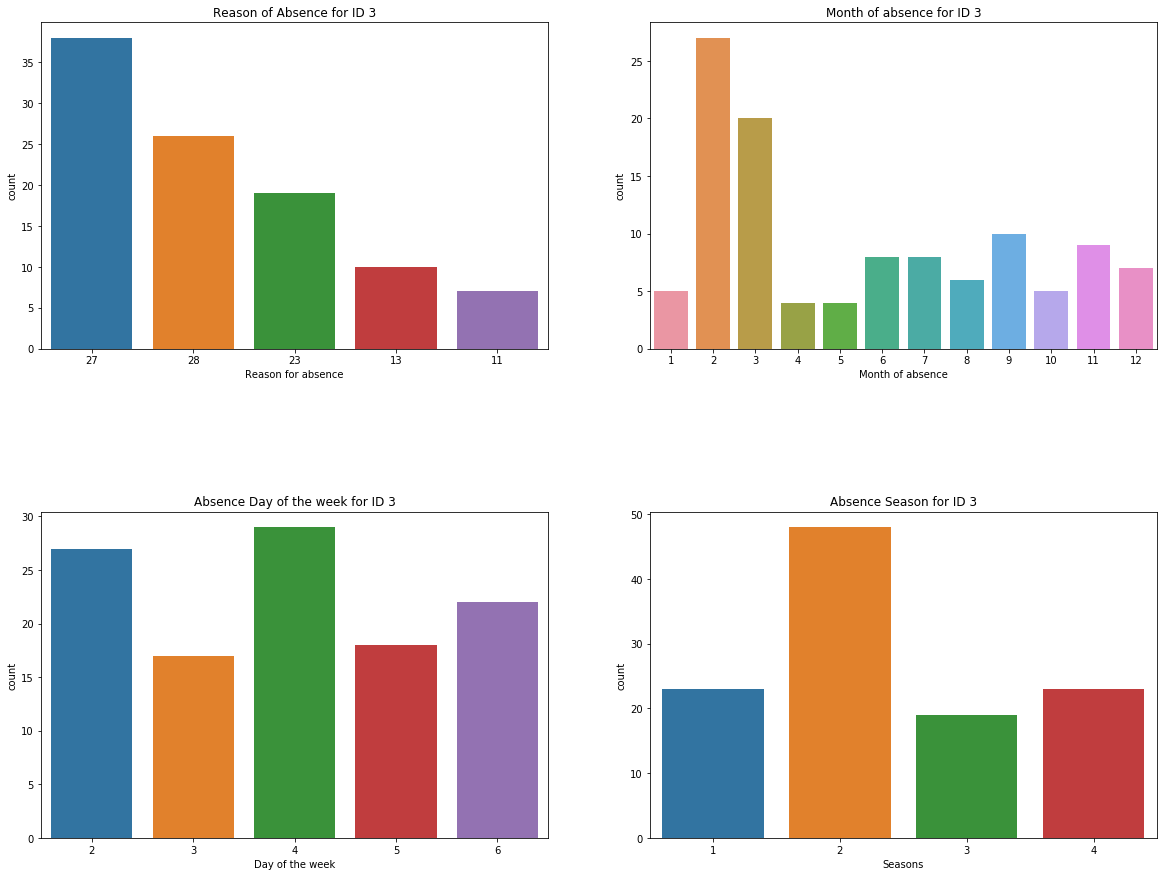

In [17]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot(df_id_3['Reason for absence'], order=(df_id_3['Reason for absence'].value_counts().head(5)).index, ax=ax[0,0])
ax[0,0].set_title('Reason of Absence for ID 3')

sns.countplot('Month of absence',data=df_id_3,ax=ax[0,1])
ax[0,1].set_title('Month of absence for ID 3')

sns.countplot('Day of the week',data=df_id_3,ax=ax[1,0])
ax[1,0].set_title('Absence Day of the week for ID 3')

sns.countplot('Seasons',data=df_id_3,ax=ax[1,1])
ax[1,1].set_title('Absence Season for ID 3')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [21]:
df["Disciplinary failure"].value_counts()

0    700
1     40
Name: Disciplinary failure, dtype: int64

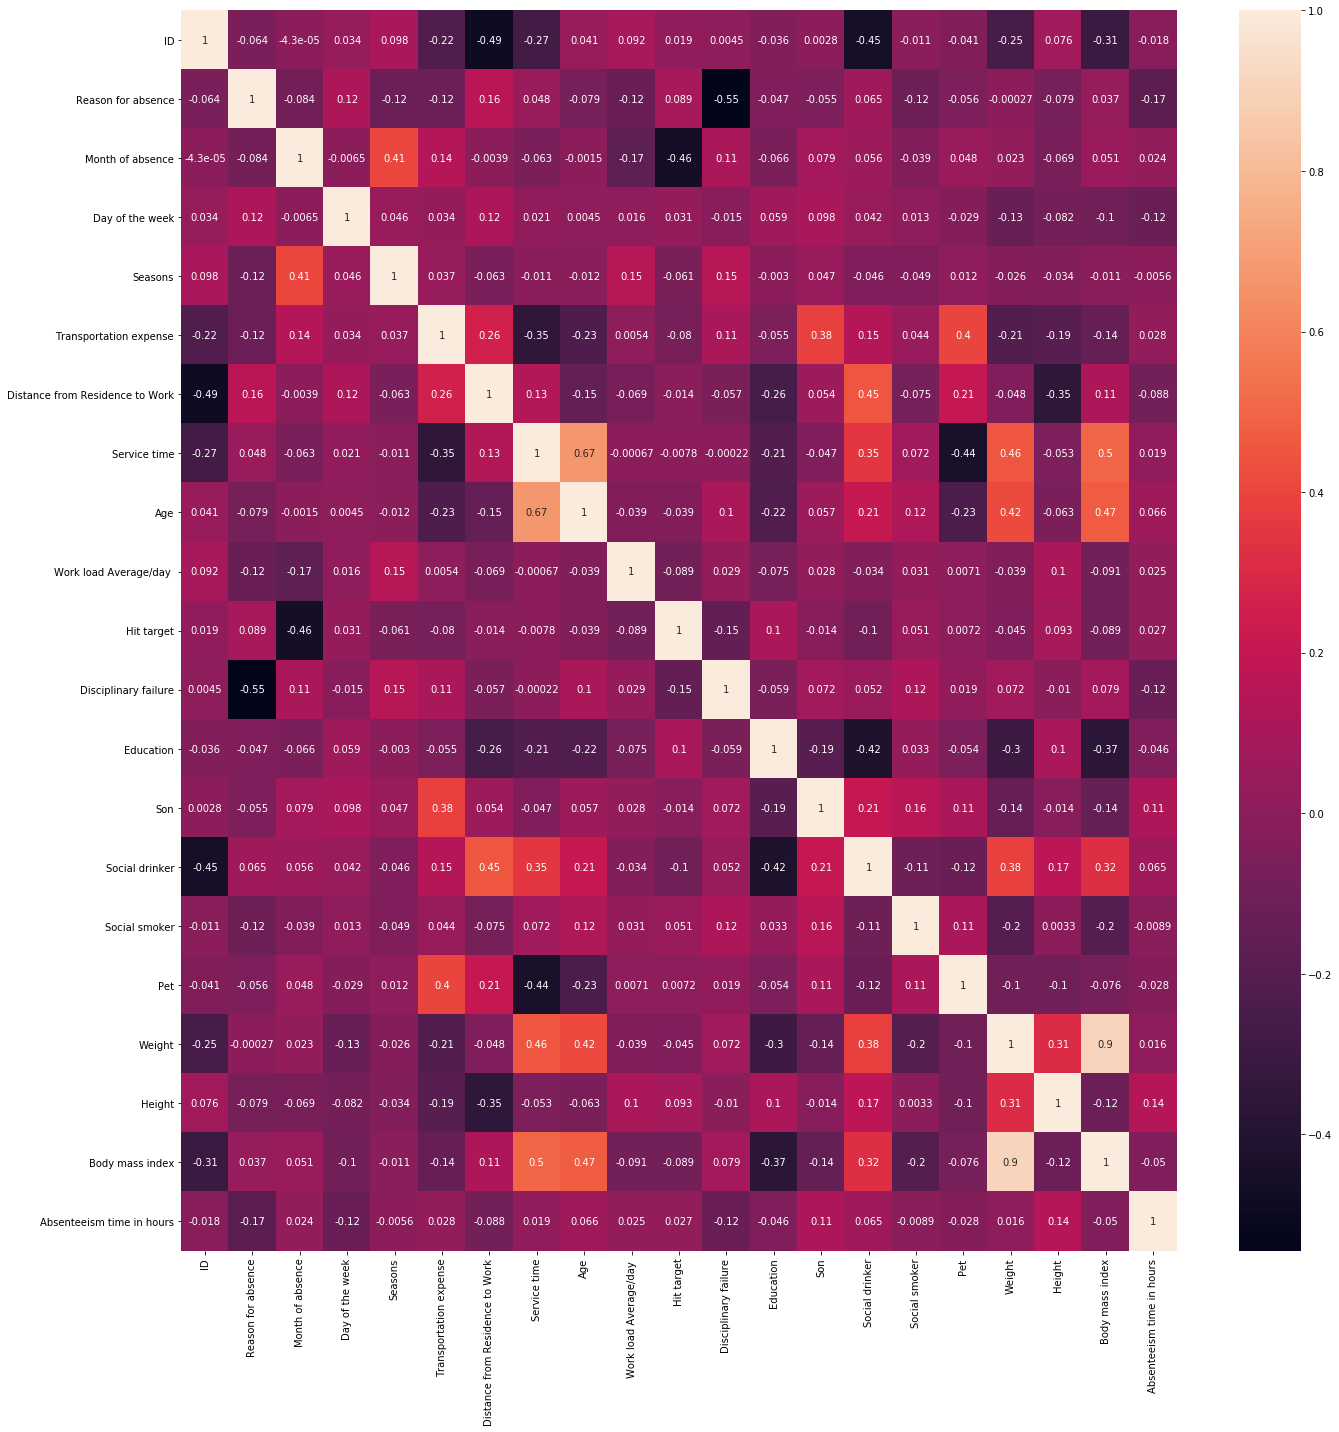

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

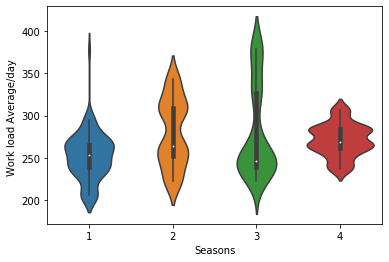

In [30]:
sns.violinplot("Seasons", "Work load Average/day ", data=df,split=True)

In [32]:
df[df["Work load Average/day "]>=370]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
204,11,13,5,4,3,289,36,13,33,378.884,...,0,1,2,1,0,1,90,172,30,8
205,14,28,5,5,3,155,12,14,34,378.884,...,0,1,2,1,0,0,95,196,25,2
206,14,28,5,2,3,155,12,14,34,378.884,...,0,1,2,1,0,0,95,196,25,1
207,3,18,5,3,3,179,51,18,38,378.884,...,0,1,0,1,0,0,89,170,31,8
208,28,19,5,3,3,225,26,9,28,378.884,...,0,1,1,0,0,2,69,169,24,8
209,27,7,5,4,3,184,42,7,27,378.884,...,0,1,0,0,0,0,58,167,21,4
210,14,28,5,2,3,155,12,14,34,378.884,...,0,1,2,1,0,0,95,196,25,2
211,3,12,5,3,3,179,51,18,38,378.884,...,0,1,0,1,0,0,89,170,31,1
212,11,13,5,4,3,289,36,13,33,378.884,...,0,1,2,1,0,1,90,172,30,24
213,7,0,5,4,3,279,5,14,39,378.884,...,1,1,2,1,1,0,68,168,24,0
